In [2]:
DATA_FOLDER_PTH=os.path.join(os.getcwd(), os.pardir, 'data')
TRAIN_TEXT_FILE_PTH=os.path.join(DATA_FOLDER_PTH, 'raw/MELD/train', 'train_sent_emo.csv')

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
dataset=pd.read_csv(TRAIN_TEXT_FILE_PTH)
dataset.head()


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


In [ ]:
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset['Sentiment']):
    dataset_train=dataset.loc[train_index].reset_index(drop=True)
    dataset_test=dataset.loc[test_index].reset_index(drop=True)

In [4]:
dataset_train.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1206,I respectfully disagree.,Chandler,neutral,neutral,123,5,9,17,"00:05:19,140","00:05:21,642"
1,3822,"No, come on dont start. Ouch!",Ross,joy,positive,385,1,3,6,"00:20:41,490","00:20:45,785"
2,2283,"So they ah, they all took off, it was pretty h...",Ross,sadness,negative,225,9,3,17,"00:22:20,839","00:22:26,635"
3,5895,Come on! What are you doing?! Im in character...,Joey,sadness,negative,596,5,6,5,"00:13:58,629","00:14:02,799"
4,7609,Stop it Chandler. Im sorry too.,Monica,sadness,negative,763,5,6,3,"00:09:44,333","00:09:49,329"


# Naive bayes

In [8]:
import glob
import librosa
import copy
import torch
import numpy as np
import seaborn as sns
from torch.utils.data import Dataset
import pandas as pd
from torch import nn
from tqdm import tqdm_notebook 
import torch.nn.functional as F
import torch.optim as optim

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix

import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bkoch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
pipeline=Pipeline([
    ('bow',CountVectorizer(tokenizer=word_tokenize, token_pattern=None)),
    ('nb',MultinomialNB())
])

In [12]:
pipeline.fit(dataset_train['Utterance'],dataset_train['Sentiment'])

preds_train=pipeline.predict(dataset_train['Utterance'])
preds_test=pipeline.predict(dataset_test['Utterance'])

In [14]:
from sklearn import metrics
print(metrics.classification_report(dataset_test['Sentiment'],preds_test))

              precision    recall  f1-score   support

    negative       0.57      0.52      0.54       589
     neutral       0.67      0.83      0.74       942
    positive       0.63      0.40      0.49       467

    accuracy                           0.64      1998
   macro avg       0.62      0.58      0.59      1998
weighted avg       0.63      0.64      0.62      1998



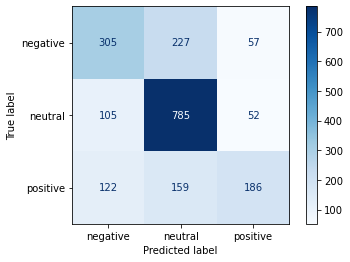

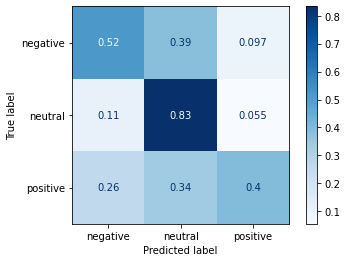

In [16]:
disp = plot_confusion_matrix(pipeline,dataset_test['Utterance'], dataset_test['Sentiment'],
                                 cmap=plt.cm.Blues)

# The most weighted mistakes are made when the true label is DNC and predicted is call back
disp = plot_confusion_matrix(pipeline,dataset_test['Utterance'], dataset_test['Sentiment'],
                                 cmap=plt.cm.Blues, normalize='true')

# Log Reg

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [20]:
pipeline=Pipeline([
    ('tfidf',TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None, ngram_range=(1,5), max_features=1000)),
    ('logreg',LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [21]:
pipeline.fit(dataset_train['Utterance'],dataset_train['Sentiment'])

preds_train=pipeline.predict(dataset_train['Utterance'])
preds_test=pipeline.predict(dataset_test['Utterance'])

In [22]:
from sklearn import metrics
print(metrics.classification_report(dataset_test['Sentiment'],preds_test))

              precision    recall  f1-score   support

    negative       0.54      0.53      0.53       589
     neutral       0.73      0.74      0.73       942
    positive       0.55      0.54      0.55       467

    accuracy                           0.63      1998
   macro avg       0.61      0.60      0.60      1998
weighted avg       0.63      0.63      0.63      1998



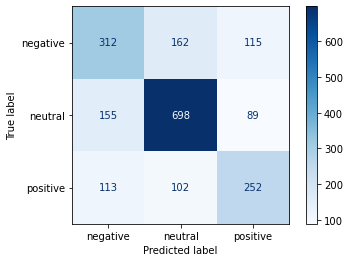

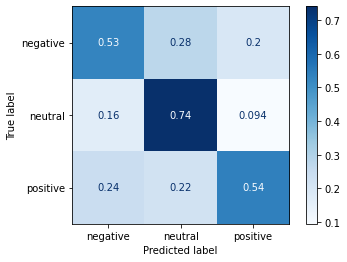

In [23]:
disp = plot_confusion_matrix(pipeline,dataset_test['Utterance'], dataset_test['Sentiment'],
                                 cmap=plt.cm.Blues)

# The most weighted mistakes are made when the true label is DNC and predicted is call back
disp = plot_confusion_matrix(pipeline,dataset_test['Utterance'], dataset_test['Sentiment'],
                                 cmap=plt.cm.Blues, normalize='true')